# **Import file and package**

> The data used can be accessed via the following [link](https://www.kaggle.com/hellbuoy/car-price-prediction)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

df = pd.read_csv(r'/content/CarPrice_Assignment.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = df.drop(labels=['car_ID', 'symboling','CarName'], axis=1)

In [4]:
#Check for duplicated data
print(df.shape)
df.duplicated().sum()

(205, 23)


1

In [5]:
#Remove for duplicated data
df.drop_duplicates(inplace=True)
print(df.shape)
print(df.duplicated().sum())

(204, 23)
0


In [6]:
df2 = pd.get_dummies(df['fueltype'], prefix='fueltype')
df2 = pd.concat([df, df2], axis=1)
df3 = pd.get_dummies(df['aspiration'], prefix='aspiration')
df3 = pd.concat([df2, df3], axis=1)
df4 = pd.get_dummies(df['doornumber'], prefix='doornumber')
df4 = pd.concat([df3, df4], axis=1)
df5 = pd.get_dummies(df['carbody'], prefix='carbody')
df5 = pd.concat([df4, df5], axis=1)
df6 = pd.get_dummies(df['drivewheel'], prefix='drivewheel')
df6 = pd.concat([df5, df6], axis=1)
df7 = pd.get_dummies(df['enginelocation'], prefix='enginelocation')
df7 = pd.concat([df6, df7], axis=1)
df8 = pd.get_dummies(df['enginetype'], prefix='enginetype')
df8 = pd.concat([df7, df8], axis=1)
df9 = pd.get_dummies(df['cylindernumber'], prefix='cylindernumber')
df9 = pd.concat([df8, df9], axis=1)
df10 = pd.get_dummies(df['fuelsystem'], prefix='fuelsystem')
df10 = pd.concat([df9, df10], axis=1)

# **Feature Selection using Backward Elimination**

In building the multiple linear regression model, the based levels used for each categorical variable are as follows: \\
1. For the fueltype variable, the based level used is a car with diesel fuel.
2. For the aspiration variable, the based level used is a turbo type car.
3. For the door number variable, the based level used is a car that has two doors.
4. For the carbody variable, the based level used is a car that has a convertible type.
5. For the variable drivewheel, the based level used is a 4WD type car.
6. For the enginelocation variable, the based level used is the car with the engine rear it.
7. For the enginetype variable, the based level used is a DOHCV type car.
8. For the cylindernumber variable, the based level used is a car that has three cylinders.
9. For the fuel system variable, the based level used is an MFI type car.

# Procedure for backward selection: 
a. Determine the dependent and independent variables on the data \\
b. Select all the independent variables in the data to build the initial model, namely 𝐸(𝑦) = 𝛽0 + 𝛽1.𝑥1 + ⋯ + 𝛽𝑝.𝑥𝑝 \\
c. If there is a variable with p-value > 0.05, then eliminate the independent variable in the model. If there is more than 1 variable with p-value > 0.05, eliminate the independent variable that has the largest p-value. \\
d. Rebuild the model with the remaining independent variables. \\
e. Repeat steps c-d until there is no variable with p-value > 0.05. So the final model is 𝐸(𝑦) = 𝛼0 + 𝛼1.**𝑥1** + ⋯ + 𝛼𝑛.**𝑥𝑛**, where **𝑥𝑛** are signifcant variables, with 𝑛 < 𝑝.

In [7]:
X = df10.drop(labels=['price'], axis=1)
y = df10['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
dftrain = pd.concat([X_train,y_train], axis=1)

In [10]:
#initial model
lm = smf.ols("price ~ fueltype_gas + aspiration_std + doornumber_four + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd +\
       enginelocation_front + wheelbase + carlength + carwidth + carheight +\
       curbweight + enginetype_dohc + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_six + cylindernumber_twelve + cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_4bbl + fuelsystem_idi + fuelsystem_mpfi +\
       fuelsystem_spdi + fuelsystem_spfi + boreratio + stroke + compressionratio + horsepower +\
       peakrpm + citympg + highwaympg", \
             dftrain).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     58.54
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           9.48e-63
Time:                        14:15:39   Log-Likelihood:                -1444.9
No. Observations:                 163   AIC:                             2970.
Df Residuals:                     123   BIC:                             3094.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.181e+04      1e+04     -1.179      0.241   -3.16e+04    8024.542
fueltype_gas           -1.62e+04   5212.413     -3.108      0.002   -2.65e+04   -5883.053
aspiration_std        -1282.2695    986.146     -1.300      0.196   -3234.286     669.747
doornumber_four         169.7774    605.694      0.280      0.780   -1029.157    1368.712
carbody_hardtop       -3629.6515   1491.454     -2.434      0.016   -6581.893    -677.410
carbody_hatchback     -4322.8217   1355.803     -3.188      0.002   -7006.551   -1639.092
carbody_sedan         -3396.3643   1496.004     -2.270      0.025   -6357.613    -435.115
carbody_wagon         -5128.5542   1640.123     -3.127      0.002   -8375.076   -1882.032
drivewheel_fwd          990.0934   1132.853      0.874      0.384   -1252.320    3232.507
drivewheel_rwd         2508.5700   1267.843      1.979      0.050      -1.048    5018.188
enginelocation_front  -1.146e+04   2756.242     -4.159      0.000   -1.69e+04   -6006.072
wheelbase                57.2835     90.419      0.634      0.528    -121.696     236.263
carlength               -61.9197     52.335     -1.183      0.239    -165.514      41.675
carwidth                784.1461    247.093      3.173      0.002     295.042    1273.251
carheight               128.7379    130.610      0.986      0.326    -129.797     387.273
curbweight                5.0241      1.685      2.982      0.003       1.689       8.359
enginetype_dohc        -381.6001   4809.167     -0.079      0.937   -9901.051    9137.851
enginetype_l          -2987.3404   5397.020     -0.554      0.581   -1.37e+04    7695.729
enginetype_ohc         2181.8209   4935.248      0.442      0.659   -7587.200     1.2e+04
enginetype_ohcf        1672.4342   4938.871      0.339      0.735   -8103.758    1.14e+04
enginetype_ohcv       -4404.8378   4530.024     -0.972      0.333   -1.34e+04    4562.067
enginetype_rotor       1810.3300   1995.050      0.907      0.366   -2138.749    5759.409
cylindernumber_eight   1432.1013   2470.752      0.580      0.563   -3458.600    6322.803
cylindernumber_five   -5368.0833   2596.940     -2.067      0.041   -1.05e+04    -227.600
cylindernumber_four   -5578.5822   2585.863     -2.157      0.033   -1.07e+04    -460.024
cylindernumber_six    -3046.2199   2092.704     -1.456      0.148   -7188.600    1096.160
cylindernumber_twelve -1058.5989   4614.625     -0.229      0.819   -1.02e+04    8075.768
cylindernumber_two     1810.3300   1995.050      0.907      0.366   -2138.749    5759.409
enginesize               94.7754     26.205      3.617      0.000      42.905     146.646
fuelsystem_1bbl        2966.6091   2373.337      1.250      0.214   -1731.265    7664.484
fuelsystem_2bbl        2692.0325   2240.085      1.202      0.232   -1742.078    7126.143
fuelsystem_4bbl        

The fuelsystem_spdi variable has the largest p-value, so it is excluded.

In [11]:
#1st elimination
lm1 = smf.ols("price ~ fueltype_gas + aspiration_std + doornumber_four + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd +\
       enginelocation_front + wheelbase + carlength + carwidth + carheight +\
       curbweight + enginetype_dohc + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_six + cylindernumber_twelve + cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_4bbl + fuelsystem_idi + fuelsystem_mpfi +\
       fuelsystem_spfi + boreratio + stroke + compressionratio + horsepower +\
       peakrpm + citympg + highwaympg", \
             dftrain).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     60.56
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.21e-63
Time:                        14:15:39   Log-Likelihood:                -1444.9
No. Observations:                 163   AIC:                             2968.
Df Residuals:                     124   BIC:                             3088.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.184e+04   9949.033     -1.190      0.236   -3.15e+04    7851.490
fueltype_gas          -1.625e+04   5046.466     -3.220      0.002   -2.62e+04   -6261.478
aspiration_std        -1282.6066    982.133     -1.306      0.194   -3226.523     661.310
doornumber_four         168.8282    602.792      0.280      0.780   -1024.265    1361.922
carbody_hardtop       -3629.7580   1485.435     -2.444      0.016   -6569.850    -689.666
carbody_hatchback     -4321.3543   1349.844     -3.201      0.002   -6993.074   -1649.634
carbody_sedan         -3394.9198   1489.539     -2.279      0.024   -6343.135    -446.704
carbody_wagon         -5126.7321   1632.882     -3.140      0.002   -8358.663   -1894.801
drivewheel_fwd          990.1694   1128.282      0.878      0.382   -1243.016    3223.355
drivewheel_rwd         2505.7508   1260.794      1.987      0.049      10.287    5001.215
enginelocation_front  -1.146e+04   2744.843     -4.175      0.000   -1.69e+04   -6027.486
wheelbase                57.1400     89.984      0.635      0.527    -120.964     235.244
carlength               -61.9092     52.124     -1.188      0.237    -165.076      41.258
carwidth                784.1173    246.095      3.186      0.002     297.027    1271.208
carheight               128.6374    130.060      0.989      0.325    -128.787     386.062
curbweight                5.0237      1.678      2.994      0.003       1.702       8.345
enginetype_dohc        -376.4227   4788.048     -0.079      0.937   -9853.311    9100.465
enginetype_l          -2979.2623   5371.518     -0.555      0.580   -1.36e+04    7652.477
enginetype_ohc         2187.9640   4912.981      0.445      0.657   -7536.201    1.19e+04
enginetype_ohcf        1675.3993   4918.399      0.341      0.734   -8059.490    1.14e+04
enginetype_ohcv       -4401.0857   4510.792     -0.976      0.331   -1.33e+04    4527.034
enginetype_rotor       1811.7730   1986.680      0.912      0.364   -2120.424    5743.970
cylindernumber_eight   1426.2728   2456.541      0.581      0.563   -3435.909    6288.455
cylindernumber_five   -5372.2916   2584.360     -2.079      0.040   -1.05e+04    -257.119
cylindernumber_four   -5582.3303   2573.756     -2.169      0.032   -1.07e+04    -488.146
cylindernumber_six    -3050.5910   2081.445     -1.466      0.145   -7170.353    1069.172
cylindernumber_twelve -1073.2658   4581.610     -0.234      0.815   -1.01e+04    7995.023
cylindernumber_two     1811.7730   1986.680      0.912      0.364   -2120.424    5743.970
enginesize               94.8046     26.089      3.634      0.000      43.167     146.442
fuelsystem_1bbl        3045.6324   1323.201      2.302      0.023     426.647    5664.617
fuelsystem_2bbl        2770.7055   1083.971      2.556      0.012     625.223    4916.188
fuelsystem_4bbl        

The enginetype_dohc variable has the largest p-value, so it is excluded.

In [12]:
#2nd elimination
lm2 = smf.ols("price ~ fueltype_gas + aspiration_std + doornumber_four + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd +\
       enginelocation_front + wheelbase + carlength + carwidth + carheight +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_six + cylindernumber_twelve + cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_4bbl + fuelsystem_idi + fuelsystem_mpfi +\
       fuelsystem_spfi + boreratio + stroke + compressionratio + horsepower +\
       peakrpm + citympg + highwaympg", \
             dftrain).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     62.70
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.52e-64
Time:                        14:15:39   Log-Likelihood:                -1444.9
No. Observations:                 163   AIC:                             2966.
Df Residuals:                     125   BIC:                             3083.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.215e+04   9115.137     -1.333      0.185   -3.02e+04    5892.729
fueltype_gas          -1.634e+04   4897.730     -3.336      0.001    -2.6e+04   -6645.813
aspiration_std        -1257.0301    922.994     -1.362      0.176   -3083.750     569.690
doornumber_four         168.1596    600.331      0.280      0.780   -1019.970    1356.289
carbody_hardtop       -3616.4670   1469.905     -2.460      0.015   -6525.591    -707.343
carbody_hatchback     -4302.3085   1322.638     -3.253      0.001   -6919.972   -1684.645
carbody_sedan         -3374.0487   1459.852     -2.311      0.022   -6263.278    -484.819
carbody_wagon         -5099.8158   1590.226     -3.207      0.002   -8247.070   -1952.561
drivewheel_fwd          990.2001   1123.787      0.881      0.380   -1233.915    3214.315
drivewheel_rwd         2493.7200   1246.487      2.001      0.048      26.767    4960.673
enginelocation_front   -1.14e+04   2626.826     -4.340      0.000   -1.66e+04   -6201.682
wheelbase                57.5001     89.510      0.642      0.522    -119.650     234.651
carlength               -63.0377     49.909     -1.263      0.209    -161.813      35.738
carwidth                784.7992    244.962      3.204      0.002     299.989    1269.610
carheight               127.7076    129.005      0.990      0.324    -127.609     383.024
curbweight                5.0328      1.668      3.018      0.003       1.733       8.333
enginetype_l          -2575.5003   1567.504     -1.643      0.103   -5677.786     526.785
enginetype_ohc         2567.4328    912.559      2.813      0.006     761.366    4373.500
enginetype_ohcf        2040.5569   1611.231      1.266      0.208   -1148.269    5229.383
enginetype_ohcv       -4056.8783   1081.017     -3.753      0.000   -6196.344   -1917.412
enginetype_rotor       1910.5101   1533.205      1.246      0.215   -1123.892    4944.913
cylindernumber_eight   1446.7254   2432.997      0.595      0.553   -3368.477    6261.927
cylindernumber_five   -5466.8114   2278.559     -2.399      0.018   -9976.362    -957.261
cylindernumber_four   -5692.3757   2151.232     -2.646      0.009   -9949.930   -1434.821
cylindernumber_six    -3148.3483   1662.548     -1.894      0.061   -6438.737     142.040
cylindernumber_twelve -1196.9579   4285.850     -0.279      0.780   -9679.188    7285.272
cylindernumber_two     1910.5101   1533.205      1.246      0.215   -1123.892    4944.913
enginesize               93.9763     23.772      3.953      0.000      46.929     141.024
fuelsystem_1bbl        3049.0229   1317.230      2.315      0.022     442.061    5655.985
fuelsystem_2bbl        2773.9424   1078.874      2.571      0.011     638.716    4909.168
fuelsystem_4bbl         817.0260   2540.133      0.322      0.748   -4210.212    5844.264
fuelsystem_idi         

The citympg variable has the largest p-value, so it is excluded.

In [13]:
#3rd elimination
lm3 = smf.ols("price ~ fueltype_gas + aspiration_std + doornumber_four + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd +\
       enginelocation_front + wheelbase + carlength + carwidth + carheight +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_six + cylindernumber_twelve + cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_4bbl + fuelsystem_idi + fuelsystem_mpfi +\
       fuelsystem_spfi + boreratio + stroke + compressionratio + horsepower +\
       peakrpm + highwaympg", \
             dftrain).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     64.94
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.89e-65
Time:                        14:15:39   Log-Likelihood:                -1444.9
No. Observations:                 163   AIC:                             2964.
Df Residuals:                     126   BIC:                             3078.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.197e+04   9019.219     -1.327      0.187   -2.98e+04    5876.207
fueltype_gas           -1.64e+04   4865.941     -3.370      0.001    -2.6e+04   -6768.471
aspiration_std        -1202.5117    859.296     -1.399      0.164   -2903.034     498.010
doornumber_four         170.8568    597.791      0.286      0.775   -1012.154    1353.868
carbody_hardtop       -3611.5892   1463.929     -2.467      0.015   -6508.663    -714.516
carbody_hatchback     -4309.1200   1316.890     -3.272      0.001   -6915.207   -1703.033
carbody_sedan         -3376.9726   1454.102     -2.322      0.022   -6254.599    -499.347
carbody_wagon         -5120.7900   1579.073     -3.243      0.002   -8245.729   -1995.850
drivewheel_fwd         1004.4348   1116.181      0.900      0.370   -1204.455    3213.324
drivewheel_rwd         2490.4506   1241.513      2.006      0.047      33.532    4947.369
enginelocation_front  -1.142e+04   2615.106     -4.365      0.000   -1.66e+04   -6240.352
wheelbase                55.2633     88.148      0.627      0.532    -119.179     229.706
carlength               -62.0575     49.367     -1.257      0.211    -159.753      35.638
carwidth                782.7312    243.700      3.212      0.002     300.457    1265.006
carheight               127.7506    128.506      0.994      0.322    -126.559     382.060
curbweight                5.0655      1.649      3.071      0.003       1.801       8.330
enginetype_l          -2553.9284   1556.073     -1.641      0.103   -5633.350     525.493
enginetype_ohc         2591.5300    897.464      2.888      0.005     815.476    4367.584
enginetype_ohcf        2035.7049   1604.737      1.269      0.207   -1140.023    5211.433
enginetype_ohcv       -4043.7380   1073.948     -3.765      0.000   -6169.050   -1918.426
enginetype_rotor       1953.6148   1505.229      1.298      0.197   -1025.190    4932.420
cylindernumber_eight   1456.6731   2422.855      0.601      0.549   -3338.086    6251.432
cylindernumber_five   -5432.0164   2260.132     -2.403      0.018   -9904.751    -959.282
cylindernumber_four   -5659.0534   2133.571     -2.652      0.009   -9881.328   -1436.779
cylindernumber_six    -3117.4523   1645.717     -1.894      0.060   -6374.277     139.373
cylindernumber_twelve -1174.3287   4267.121     -0.275      0.784   -9618.836    7270.179
cylindernumber_two     1953.6148   1505.229      1.298      0.197   -1025.190    4932.420
enginesize               93.3806     23.409      3.989      0.000      47.055     139.706
fuelsystem_1bbl        3029.0813   1306.673      2.318      0.022     443.214    5614.949
fuelsystem_2bbl        2774.3745   1074.700      2.582      0.011     647.575    4901.174
fuelsystem_4bbl         834.7487   2528.078      0.330      0.742   -4168.243    5837.740
fuelsystem_idi         

The horsepower variable has the largest p-value, so it is excluded.

In [14]:
#4th elimination
lm4 = smf.ols("price ~ fueltype_gas + aspiration_std + doornumber_four + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd +\
       enginelocation_front + wheelbase + carlength + carwidth + carheight +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_six + cylindernumber_twelve + cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_4bbl + fuelsystem_idi + fuelsystem_mpfi +\
       fuelsystem_spfi + boreratio + stroke + compressionratio +\
       peakrpm + highwaympg", \
             dftrain).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     67.31
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           2.31e-66
Time:                        14:15:40   Log-Likelihood:                -1445.0
No. Observations:                 163   AIC:                             2962.
Df Residuals:                     127   BIC:                             3073.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.182e+04   8932.761     -1.323      0.188   -2.95e+04    5859.828
fueltype_gas           -1.63e+04   4809.834     -3.389      0.001   -2.58e+04   -6782.864
aspiration_std        -1137.3953    755.736     -1.505      0.135   -2632.861     358.070
doornumber_four         169.5488    595.440      0.285      0.776   -1008.719    1347.816
carbody_hardtop       -3670.5576   1412.139     -2.599      0.010   -6464.926    -876.189
carbody_hatchback     -4373.1863   1250.792     -3.496      0.001   -6848.277   -1898.096
carbody_sedan         -3431.7571   1408.481     -2.436      0.016   -6218.887    -644.628
carbody_wagon         -5172.6726   1540.054     -3.359      0.001   -8220.162   -2125.184
drivewheel_fwd          989.3934   1108.009      0.893      0.374   -1203.156    3181.943
drivewheel_rwd         2470.6824   1230.708      2.008      0.047      35.334    4906.031
enginelocation_front  -1.128e+04   2470.897     -4.566      0.000   -1.62e+04   -6392.434
wheelbase                60.5611     81.492      0.743      0.459    -100.696     221.818
carlength               -62.3541     49.143     -1.269      0.207    -159.599      34.891
carwidth                772.3868    234.214      3.298      0.001     308.920    1235.853
carheight               126.1778    127.643      0.989      0.325    -126.405     378.761
curbweight                5.0157      1.614      3.108      0.002       1.822       8.209
enginetype_l          -2481.9289   1485.003     -1.671      0.097   -5420.483     456.625
enginetype_ohc         2631.5370    859.225      3.063      0.003     931.285    4331.789
enginetype_ohcf        2108.2692   1534.524      1.374      0.172    -928.277    5144.816
enginetype_ohcv       -3977.1841    987.784     -4.026      0.000   -5931.830   -2022.538
enginetype_rotor       2009.8551   1458.698      1.378      0.171    -876.645    4896.356
cylindernumber_eight   1426.4257   2406.313      0.593      0.554   -3335.233    6188.084
cylindernumber_five   -5301.6030   2102.586     -2.521      0.013   -9462.241   -1140.965
cylindernumber_four   -5517.5950   1937.686     -2.848      0.005   -9351.925   -1683.265
cylindernumber_six    -3072.9390   1616.200     -1.901      0.060   -6271.106     125.229
cylindernumber_twelve -1360.6377   4092.171     -0.332      0.740   -9458.306    6737.030
cylindernumber_two     2009.8551   1458.698      1.378      0.171    -876.645    4896.356
enginesize               93.0733     23.241      4.005      0.000      47.083     139.064
fuelsystem_1bbl        3043.6254   1298.553      2.344      0.021     474.024    5613.227
fuelsystem_2bbl        2790.1745   1066.118      2.617      0.010     680.518    4899.831
fuelsystem_4bbl         907.3671   2478.143      0.366      0.715   -3996.431    5811.166
fuelsystem_idi         

The doornumber_four variable has the largest p-value, so it is excluded.

In [15]:
#5th elimination
lm5 = smf.ols("price ~ fueltype_gas + aspiration_std + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd +\
       enginelocation_front + wheelbase + carlength + carwidth + carheight +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_six + cylindernumber_twelve + cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_4bbl + fuelsystem_idi + fuelsystem_mpfi +\
       fuelsystem_spfi + boreratio + stroke + compressionratio +\
       peakrpm + highwaympg", \
             dftrain).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     69.79
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           2.85e-67
Time:                        14:15:40   Log-Likelihood:                -1445.0
No. Observations:                 163   AIC:                             2960.
Df Residuals:                     128   BIC:                             3068.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.183e+04   8900.586     -1.329      0.186   -2.94e+04    5786.087
fueltype_gas          -1.642e+04   4773.164     -3.441      0.001   -2.59e+04   -6979.162
aspiration_std        -1112.7016    748.044     -1.487      0.139   -2592.835     367.432
carbody_hardtop       -3688.3444   1405.684     -2.624      0.010   -6469.730    -906.959
carbody_hatchback     -4372.1681   1246.289     -3.508      0.001   -6838.163   -1906.173
carbody_sedan         -3330.5088   1357.958     -2.453      0.016   -6017.462    -643.556
carbody_wagon         -5071.8528   1493.410     -3.396      0.001   -8026.820   -2116.886
drivewheel_fwd         1004.9490   1102.682      0.911      0.364   -1176.895    3186.793
drivewheel_rwd         2448.7594   1223.880      2.001      0.048      27.103    4870.416
enginelocation_front  -1.138e+04   2439.418     -4.664      0.000   -1.62e+04   -6550.188
wheelbase                63.9982     80.303      0.797      0.427     -94.895     222.891
carlength               -60.6903     48.619     -1.248      0.214    -156.891      35.510
carwidth                769.0578    233.080      3.300      0.001     307.868    1230.247
carheight               125.2013    127.138      0.985      0.327    -126.364     376.767
curbweight                5.0728      1.596      3.179      0.002       1.915       8.230
enginetype_l          -2518.3309   1474.170     -1.708      0.090   -5435.229     398.567
enginetype_ohc         2632.4171    856.130      3.075      0.003     938.418    4326.416
enginetype_ohcf        2094.5908   1528.257      1.371      0.173    -929.326    5118.508
enginetype_ohcv       -3969.4052    983.855     -4.035      0.000   -5916.131   -2022.679
enginetype_rotor       1989.4681   1451.701      1.370      0.173    -882.970    4861.906
cylindernumber_eight   1453.3587   2395.807      0.607      0.545   -3287.154    6193.872
cylindernumber_five   -5334.4254   2091.874     -2.550      0.012   -9473.556   -1195.295
cylindernumber_four   -5556.6948   1925.864     -2.885      0.005   -9367.345   -1746.045
cylindernumber_six    -3063.8873   1610.076     -1.903      0.059   -6249.698     121.924
cylindernumber_twelve -1313.0621   4074.056     -0.322      0.748   -9374.277    6748.153
cylindernumber_two     1989.4681   1451.701      1.370      0.173    -882.970    4861.906
enginesize               91.8046     22.728      4.039      0.000      46.833     136.776
fuelsystem_1bbl        3084.9664   1285.770      2.399      0.018     540.850    5629.083
fuelsystem_2bbl        2798.6979   1061.866      2.636      0.009     697.615    4899.781
fuelsystem_4bbl         911.5684   2469.188      0.369      0.713   -3974.142    5797.279
fuelsystem_idi         4598.4400   6688.433      0.688      0.493   -8635.768    1.78e+04
fuelsystem_mpfi        

The cylindernumber_twelve variable has the largest p-value, so it is excluded.

In [16]:
#6th elimination
lm6 = smf.ols("price ~ fueltype_gas + aspiration_std + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd +\
       enginelocation_front + wheelbase + carlength + carwidth + carheight +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_six + cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_4bbl + fuelsystem_idi + fuelsystem_mpfi +\
       fuelsystem_spfi + boreratio + stroke + compressionratio +\
       peakrpm + highwaympg", \
             dftrain).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     69.79
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           2.85e-67
Time:                        14:15:40   Log-Likelihood:                -1445.0
No. Observations:                 163   AIC:                             2960.
Df Residuals:                     128   BIC:                             3068.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -1.27e+04   1.05e+04     -1.205      0.230   -3.35e+04    8147.029
fueltype_gas         -1.686e+04   4978.415     -3.387      0.001   -2.67e+04   -7010.725
aspiration_std       -1112.7016    748.044     -1.487      0.139   -2592.835     367.432
carbody_hardtop      -3688.3444   1405.684     -2.624      0.010   -6469.730    -906.959
carbody_hatchback    -4372.1681   1246.289     -3.508      0.001   -6838.163   -1906.173
carbody_sedan        -3330.5088   1357.958     -2.453      0.016   -6017.462    -643.556
carbody_wagon        -5071.8528   1493.410     -3.396      0.001   -8026.820   -2116.886
drivewheel_fwd        1004.9490   1102.682      0.911      0.364   -1176.895    3186.793
drivewheel_rwd        2448.7594   1223.880      2.001      0.048      27.103    4870.416
enginelocation_front -1.138e+04   2439.418     -4.664      0.000   -1.62e+04   -6550.188
wheelbase               63.9982     80.303      0.797      0.427     -94.895     222.891
carlength              -60.6903     48.619     -1.248      0.214    -156.891      35.510
carwidth               769.0578    233.080      3.300      0.001     307.868    1230.247
carheight              125.2013    127.138      0.985      0.327    -126.364     376.767
curbweight               5.0728      1.596      3.179      0.002       1.915       8.230
enginetype_l         -2518.3309   1474.170     -1.708      0.090   -5435.229     398.567
enginetype_ohc        2632.4171    856.130      3.075      0.003     938.418    4326.416
enginetype_ohcf       2094.5908   1528.257      1.371      0.173    -929.326    5118.508
enginetype_ohcv      -3969.4052    983.855     -4.035      0.000   -5916.131   -2022.679
enginetype_rotor      2645.9991   2864.123      0.924      0.357   -3021.157    8313.156
cylindernumber_eight  2766.4208   3661.567      0.756      0.451   -4478.615       1e+04
cylindernumber_five  -4021.3633   4686.473     -0.858      0.392   -1.33e+04    5251.625
cylindernumber_four  -4243.6327   4828.575     -0.879      0.381   -1.38e+04    5310.529
cylindernumber_six   -1750.8252   4099.507     -0.427      0.670   -9862.401    6360.750
cylindernumber_two    2645.9991   2864.123      0.924      0.357   -3021.157    8313.156
enginesize              91.8046     22.728      4.039      0.000      46.833     136.776
fuelsystem_1bbl       3084.9664   1285.770      2.399      0.018     540.850    5629.083
fuelsystem_2bbl       2798.6979   1061.866      2.636      0.009     697.615    4899.781
fuelsystem_4bbl        911.5684   2469.188      0.369      0.713   -3974.142    5797.279
fuelsystem_idi        4160.7527   7656.959      0.543      0.588    -1.1e+04    1.93e+04
fuelsystem_mpfi       2893.2431   1014.036      2.853      0.005     886.799    4899.687
fuelsystem_spfi       2188.9195   2253.536      0.971    

The fuelsystem_4bbl variable has the largest p-value, so it is excluded.

In [17]:
#7th elimination
lm7 = smf.ols("price ~ fueltype_gas + aspiration_std + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd +\
       enginelocation_front + wheelbase + carlength + carwidth + carheight +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_six + cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_idi + fuelsystem_mpfi +\
       fuelsystem_spfi + boreratio + stroke + compressionratio +\
       peakrpm + highwaympg", \
             dftrain).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     72.39
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           3.55e-68
Time:                        14:15:40   Log-Likelihood:                -1445.1
No. Observations:                 163   AIC:                             2958.
Df Residuals:                     129   BIC:                             3063.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.306e+04   1.05e+04     -1.249      0.214   -3.37e+04    7623.640
fueltype_gas         -1.685e+04   4961.535     -3.395      0.001   -2.67e+04   -7028.947
aspiration_std       -1098.4665    744.545     -1.475      0.143   -2571.566     374.633
carbody_hardtop      -3706.7812   1400.086     -2.648      0.009   -6476.885    -936.677
carbody_hatchback    -4399.7715   1239.872     -3.549      0.001   -6852.889   -1946.654
carbody_sedan        -3357.9905   1351.370     -2.485      0.014   -6031.708    -684.272
carbody_wagon        -5104.0333   1485.865     -3.435      0.001   -8043.853   -2164.214
drivewheel_fwd         971.5994   1095.290      0.887      0.377   -1195.459    3138.658
drivewheel_rwd        2434.0529   1219.130      1.997      0.048      21.974    4846.131
enginelocation_front  -1.14e+04   2430.382     -4.691      0.000   -1.62e+04   -6592.307
wheelbase               65.4590     79.936      0.819      0.414     -92.697     223.615
carlength              -59.7970     48.396     -1.236      0.219    -155.549      35.955
carwidth               771.3154    232.219      3.322      0.001     311.865    1230.766
carheight              128.0003    126.487      1.012      0.313    -122.257     378.257
curbweight               5.0313      1.586      3.171      0.002       1.892       8.170
enginetype_l         -2522.2732   1469.188     -1.717      0.088   -5429.098     384.552
enginetype_ohc        2612.1272    851.499      3.068      0.003     927.416    4296.839
enginetype_ohcf       2071.2574   1521.829      1.361      0.176    -939.718    5082.233
enginetype_ohcv      -3954.2125    979.698     -4.036      0.000   -5892.569   -2015.856
enginetype_rotor      2888.7173   2778.295      1.040      0.300   -2608.207    8385.641
cylindernumber_eight  2740.8241   3648.634      0.751      0.454   -4478.088    9959.736
cylindernumber_five  -4044.4815   4670.341     -0.866      0.388   -1.33e+04    5195.903
cylindernumber_four  -4307.8744   4809.258     -0.896      0.372   -1.38e+04    5207.359
cylindernumber_six   -1783.9439   4084.782     -0.437      0.663   -9865.785    6297.897
cylindernumber_two    2888.7173   2778.295      1.040      0.300   -2608.207    8385.641
enginesize              91.3409     22.618      4.039      0.000      46.592     136.090
fuelsystem_1bbl       2955.0910   1232.560      2.398      0.018     516.441    5393.741
fuelsystem_2bbl       2657.0515    986.805      2.693      0.008     704.634    4609.470
fuelsystem_idi        3782.9995   7562.836      0.500      0.618   -1.12e+04    1.87e+04
fuelsystem_mpfi       2736.3547    917.604      2.982      0.003     920.853    4551.856
fuelsystem_spfi       2054.2096   2216.342      0.927      0.356   -2330.876    6439.296
boreratio            -3025.2724   1309.997     -2.309    

The cylindernumber_six variable has the largest p-value, so it is excluded.

In [18]:
#8th elimination
lm8 = smf.ols("price ~ fueltype_gas + aspiration_std + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd +\
       enginelocation_front + wheelbase + carlength + carwidth + carheight +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_idi + fuelsystem_mpfi +\
       fuelsystem_spfi + boreratio + stroke + compressionratio +\
       peakrpm + highwaympg", \
             dftrain).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     75.11
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           4.45e-69
Time:                        14:15:40   Log-Likelihood:                -1445.2
No. Observations:                 163   AIC:                             2956.
Df Residuals:                     130   BIC:                             3059.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.478e+04   9655.074     -1.531      0.128   -3.39e+04    4319.022
fueltype_gas         -1.686e+04   4945.870     -3.410      0.001   -2.66e+04   -7080.050
aspiration_std       -1199.4318    705.537     -1.700      0.092   -2595.252     196.388
carbody_hardtop      -3694.0473   1395.418     -2.647      0.009   -6454.716    -933.379
carbody_hatchback    -4315.6082   1220.986     -3.535      0.001   -6731.182   -1900.034
carbody_sedan        -3224.5155   1312.253     -2.457      0.015   -5820.651    -628.380
carbody_wagon        -4927.9872   1425.683     -3.457      0.001   -7748.530   -2107.445
drivewheel_fwd         890.8767   1076.216      0.828      0.409   -1238.288    3020.042
drivewheel_rwd        2326.9025   1190.464      1.955      0.053     -28.289    4682.094
enginelocation_front -1.121e+04   2381.793     -4.705      0.000   -1.59e+04   -6494.313
wheelbase               59.3454     78.456      0.756      0.451     -95.870     214.561
carlength              -63.5746     47.468     -1.339      0.183    -157.484      30.335
carwidth               781.8805    230.235      3.396      0.001     326.387    1237.374
carheight              123.3410    125.643      0.982      0.328    -125.229     371.911
curbweight               4.8797      1.543      3.162      0.002       1.827       7.933
enginetype_l         -2313.8450   1385.182     -1.670      0.097   -5054.262     426.572
enginetype_ohc        2673.6371    837.152      3.194      0.002    1017.431    4329.843
enginetype_ohcf       2038.0454   1515.189      1.345      0.181    -959.575    5035.666
enginetype_ohcv      -3957.9524    976.606     -4.053      0.000   -5890.052   -2025.853
enginetype_rotor      4028.3799    950.558      4.238      0.000    2147.814    5908.946
cylindernumber_eight  4184.8221   1538.015      2.721      0.007    1142.044    7227.600
cylindernumber_five  -2077.4458   1231.433     -1.687      0.094   -4513.688     358.797
cylindernumber_four  -2261.3324   1078.178     -2.097      0.038   -4394.379    -128.286
cylindernumber_two    4028.3799    950.558      4.238      0.000    2147.814    5908.946
enginesize              98.5466     15.422      6.390      0.000      68.036     129.057
fuelsystem_1bbl       2897.5501   1221.678      2.372      0.019     480.607    5314.493
fuelsystem_2bbl       2629.4120    981.704      2.678      0.008     687.229    4571.595
fuelsystem_idi        2082.4744   6463.230      0.322      0.748   -1.07e+04    1.49e+04
fuelsystem_mpfi       2701.4599    911.269      2.965      0.004     898.623    4504.296
fuelsystem_spfi       2037.2315   2209.092      0.922      0.358   -2333.193    6407.656
boreratio            -3183.6887   1254.851     -2.537      0.012   -5666.262    -701.115
stroke               -3397.4534    793.021     -4.284    

The fuelsystem_idi variable has the largest p-value, so it is excluded.

In [19]:
#9th elimination
lm9 = smf.ols("price ~ fueltype_gas + aspiration_std + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd +\
       enginelocation_front + wheelbase + carlength + carwidth + carheight +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_mpfi +\
       fuelsystem_spfi + boreratio + stroke + compressionratio +\
       peakrpm + highwaympg", \
             dftrain).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     75.11
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           4.45e-69
Time:                        14:15:40   Log-Likelihood:                -1445.2
No. Observations:                 163   AIC:                             2956.
Df Residuals:                     130   BIC:                             3059.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -1.27e+04   1.57e+04     -0.810      0.419   -4.37e+04    1.83e+04
fueltype_gas         -1.895e+04   6264.940     -3.024      0.003   -3.13e+04   -6552.901
aspiration_std       -1199.4318    705.537     -1.700      0.092   -2595.252     196.388
carbody_hardtop      -3694.0473   1395.418     -2.647      0.009   -6454.716    -933.379
carbody_hatchback    -4315.6082   1220.986     -3.535      0.001   -6731.182   -1900.034
carbody_sedan        -3224.5155   1312.253     -2.457      0.015   -5820.651    -628.380
carbody_wagon        -4927.9872   1425.683     -3.457      0.001   -7748.530   -2107.445
drivewheel_fwd         890.8767   1076.216      0.828      0.409   -1238.288    3020.042
drivewheel_rwd        2326.9025   1190.464      1.955      0.053     -28.289    4682.094
enginelocation_front -1.121e+04   2381.793     -4.705      0.000   -1.59e+04   -6494.313
wheelbase               59.3454     78.456      0.756      0.451     -95.870     214.561
carlength              -63.5746     47.468     -1.339      0.183    -157.484      30.335
carwidth               781.8805    230.235      3.396      0.001     326.387    1237.374
carheight              123.3410    125.643      0.982      0.328    -125.229     371.911
curbweight               4.8797      1.543      3.162      0.002       1.827       7.933
enginetype_l         -2313.8450   1385.182     -1.670      0.097   -5054.262     426.572
enginetype_ohc        2673.6371    837.152      3.194      0.002    1017.431    4329.843
enginetype_ohcf       2038.0454   1515.189      1.345      0.181    -959.575    5035.666
enginetype_ohcv      -3957.9524    976.606     -4.053      0.000   -5890.052   -2025.853
enginetype_rotor      4028.3799    950.558      4.238      0.000    2147.814    5908.946
cylindernumber_eight  4184.8221   1538.015      2.721      0.007    1142.044    7227.600
cylindernumber_five  -2077.4458   1231.433     -1.687      0.094   -4513.688     358.797
cylindernumber_four  -2261.3324   1078.178     -2.097      0.038   -4394.379    -128.286
cylindernumber_two    4028.3799    950.558      4.238      0.000    2147.814    5908.946
enginesize              98.5466     15.422      6.390      0.000      68.036     129.057
fuelsystem_1bbl       2897.5501   1221.678      2.372      0.019     480.607    5314.493
fuelsystem_2bbl       2629.4120    981.704      2.678      0.008     687.229    4571.595
fuelsystem_mpfi       2701.4599    911.269      2.965      0.004     898.623    4504.296
fuelsystem_spfi       2037.2315   2209.092      0.922      0.358   -2333.193    6407.656
boreratio            -3183.6887   1254.851     -2.537      0.012   -5666.262    -701.115
stroke               -3397.4534    793.021     -4.284      0.000   -4966.351   -1828.555
compressionratio     -1190.8647    420.785     -2.830    

The highwaympg variable has the largest p-value, so it is excluded.

In [20]:
#10th elimination
lm10 = smf.ols("price ~ fueltype_gas + aspiration_std + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd +\
       enginelocation_front + wheelbase + carlength + carwidth + carheight +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_mpfi +\
       fuelsystem_spfi + boreratio + stroke + compressionratio +\
       peakrpm", \
             dftrain).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     77.78
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           6.57e-70
Time:                        14:15:41   Log-Likelihood:                -1445.6
No. Observations:                 163   AIC:                             2955.
Df Residuals:                     131   BIC:                             3054.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.066e+04   1.54e+04     -0.692      0.490   -4.11e+04    1.98e+04
fueltype_gas         -1.831e+04   6195.238     -2.955      0.004   -3.06e+04   -6049.579
aspiration_std       -1112.9977    694.812     -1.602      0.112   -2487.502     261.507
carbody_hardtop      -3608.4758   1388.363     -2.599      0.010   -6354.989    -861.963
carbody_hatchback    -4185.2550   1206.416     -3.469      0.001   -6571.833   -1798.677
carbody_sedan        -3052.4808   1289.712     -2.367      0.019   -5603.839    -501.123
carbody_wagon        -4760.7633   1405.627     -3.387      0.001   -7541.429   -1980.098
drivewheel_fwd         953.0776   1071.180      0.890      0.375   -1165.972    3072.127
drivewheel_rwd        2342.1462   1188.280      1.971      0.051      -8.556    4692.848
enginelocation_front -1.143e+04   2359.487     -4.843      0.000   -1.61e+04   -6759.040
wheelbase               58.8296     78.320      0.751      0.454     -96.107     213.766
carlength              -72.5123     45.858     -1.581      0.116    -163.231      18.206
carwidth               800.0952    228.555      3.501      0.001     347.960    1252.231
carheight              114.3107    124.849      0.916      0.362    -132.671     361.292
curbweight               4.6990      1.522      3.088      0.002       1.689       7.709
enginetype_l         -2311.0557   1382.839     -1.671      0.097   -5046.642     424.530
enginetype_ohc        2689.8355    835.459      3.220      0.002    1037.098    4342.573
enginetype_ohcf       1852.9765   1492.281      1.242      0.217   -1099.111    4805.064
enginetype_ohcv      -4032.9646    969.792     -4.159      0.000   -5951.445   -2114.484
enginetype_rotor      3837.1571    913.907      4.199      0.000    2029.231    5645.083
cylindernumber_eight  4265.5279   1531.627      2.785      0.006    1235.604    7295.452
cylindernumber_five  -2168.9678   1223.257     -1.773      0.079   -4588.861     250.926
cylindernumber_four  -2225.6538   1075.302     -2.070      0.040   -4352.858     -98.450
cylindernumber_two    3837.1571    913.907      4.199      0.000    2029.231    5645.083
enginesize              96.8236     15.223      6.360      0.000      66.709     126.938
fuelsystem_1bbl       3049.5434   1202.587      2.536      0.012     670.540    5428.547
fuelsystem_2bbl       2748.9023    966.953      2.843      0.005     836.038    4661.767
fuelsystem_mpfi       2740.7711    908.213      3.018      0.003     944.109    4537.433
fuelsystem_spfi       1992.4067   2204.550      0.904      0.368   -2368.720    6353.533
boreratio            -3127.1184   1250.451     -2.501      0.014   -5600.809    -653.428
stroke               -3393.3233    791.664     -4.286      0.000   -4959.423   -1827.223
compressionratio     -1115.6670    407.881     -2.735    

The wheelbase variable has the largest p-value, so it is excluded.

In [21]:
#11th elimination
lm11 = smf.ols("price ~ fueltype_gas + aspiration_std + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd +\
       enginelocation_front + carlength + carwidth + carheight +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_mpfi +\
       fuelsystem_spfi + boreratio + stroke + compressionratio +\
       peakrpm", \
             dftrain).fit()
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     80.62
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           9.57e-71
Time:                        14:15:41   Log-Likelihood:                -1445.9
No. Observations:                 163   AIC:                             2954.
Df Residuals:                     132   BIC:                             3050.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.142e+04   1.53e+04     -0.744      0.458   -4.18e+04    1.89e+04
fueltype_gas         -1.883e+04   6146.238     -3.063      0.003    -3.1e+04   -6667.565
aspiration_std       -1093.8628    693.198     -1.578      0.117   -2465.077     277.352
carbody_hardtop      -3429.0768   1365.406     -2.511      0.013   -6129.985    -728.169
carbody_hatchback    -3957.9691   1165.923     -3.395      0.001   -6264.281   -1651.657
carbody_sedan        -2809.0693   1246.275     -2.254      0.026   -5274.324    -343.815
carbody_wagon        -4518.4981   1365.863     -3.308      0.001   -7220.311   -1816.686
drivewheel_fwd        1036.7045   1063.619      0.975      0.331   -1067.238    3140.647
drivewheel_rwd        2533.4984   1158.735      2.186      0.031     241.406    4825.590
enginelocation_front -1.102e+04   2292.190     -4.807      0.000   -1.56e+04   -6484.074
carlength              -60.3485     42.833     -1.409      0.161    -145.077      24.380
carwidth               841.4537    221.457      3.800      0.000     403.391    1279.517
carheight              149.1944    115.699      1.290      0.199     -79.669     378.058
curbweight               4.6295      1.516      3.053      0.003       1.630       7.629
enginetype_l         -2114.1794   1355.529     -1.560      0.121   -4795.551     567.192
enginetype_ohc        2732.3716    832.161      3.283      0.001    1086.276    4378.468
enginetype_ohcf       1970.1315   1481.656      1.330      0.186    -960.731    4900.994
enginetype_ohcv      -4177.3394    948.984     -4.402      0.000   -6054.523   -2300.155
enginetype_rotor      3926.8375    904.578      4.341      0.000    2137.493    5716.182
cylindernumber_eight  4289.2739   1528.771      2.806      0.006    1265.214    7313.334
cylindernumber_five  -2171.2154   1221.232     -1.778      0.078   -4586.933     244.502
cylindernumber_four  -2198.7425   1072.930     -2.049      0.042   -4321.103     -76.382
cylindernumber_two    3926.8375    904.578      4.341      0.000    2137.493    5716.182
enginesize              99.0755     14.900      6.649      0.000      69.602     128.549
fuelsystem_1bbl       3105.0063   1198.335      2.591      0.011     734.582    5475.431
fuelsystem_2bbl       2815.8950    961.241      2.929      0.004     914.466    4717.324
fuelsystem_mpfi       2795.9743    903.739      3.094      0.002    1008.289    4583.660
fuelsystem_spfi       1985.3406   2200.888      0.902      0.369   -2368.234    6338.915
boreratio            -3244.3438   1238.624     -2.619      0.010   -5694.465    -794.222
stroke               -3360.2106    789.130     -4.258      0.000   -4921.187   -1799.234
compressionratio     -1148.3841    404.878     -2.836      0.005   -1949.274    -347.495
peakrpm                  1.6593      0.531      3.122    

The fuelsystem_spfi variable has the largest p-value, so it is excluded.

In [22]:
#12th elimination
lm12 = smf.ols("price ~ fueltype_gas + aspiration_std + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd +\
       enginelocation_front + carlength + carwidth + carheight +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_mpfi +\
       boreratio + stroke + compressionratio +\
       peakrpm", \
             dftrain).fit()
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     83.49
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.55e-71
Time:                        14:15:41   Log-Likelihood:                -1446.4
No. Observations:                 163   AIC:                             2953.
Df Residuals:                     133   BIC:                             3046.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.196e+04   1.53e+04     -0.781      0.436   -4.23e+04    1.83e+04
fueltype_gas         -1.758e+04   5984.780     -2.937      0.004   -2.94e+04   -5741.610
aspiration_std       -1022.9724    688.247     -1.486      0.140   -2384.297     338.353
carbody_hardtop      -3392.6515   1363.853     -2.488      0.014   -6090.299    -695.004
carbody_hatchback    -3845.1210   1158.381     -3.319      0.001   -6136.353   -1553.889
carbody_sedan        -2714.3743   1240.976     -2.187      0.030   -5168.976    -259.773
carbody_wagon        -4462.5106   1363.497     -3.273      0.001   -7159.454   -1765.567
drivewheel_fwd        1045.2910   1062.831      0.983      0.327   -1056.948    3147.529
drivewheel_rwd        2625.2853   1153.450      2.276      0.024     343.806    4906.765
enginelocation_front -1.113e+04   2287.428     -4.864      0.000   -1.57e+04   -6602.319
carlength              -60.1285     42.802     -1.405      0.162    -144.790      24.533
carwidth               824.4812    220.501      3.739      0.000     388.338    1260.624
carheight              146.4584    115.578      1.267      0.207     -82.151     375.067
curbweight               4.8487      1.496      3.242      0.002       1.891       7.807
enginetype_l         -2103.4433   1354.528     -1.553      0.123   -4782.647     575.760
enginetype_ohc        2760.6570    830.987      3.322      0.001    1116.997    4404.317
enginetype_ohcf       2042.7876   1478.429      1.382      0.169    -881.487    4967.062
enginetype_ohcv      -4101.0717    944.548     -4.342      0.000   -5969.351   -2232.793
enginetype_rotor      3753.9442    883.420      4.249      0.000    2006.573    5501.315
cylindernumber_eight  4412.1842   1521.620      2.900      0.004    1402.478    7421.890
cylindernumber_five  -2051.4313   1213.141     -1.691      0.093   -4450.977     348.114
cylindernumber_four  -2164.8778   1071.521     -2.020      0.045   -4284.306     -45.450
cylindernumber_two    3753.9442    883.420      4.249      0.000    2006.573    5501.315
enginesize              96.6440     14.644      6.600      0.000      67.679     125.609
fuelsystem_1bbl       2832.3517   1158.777      2.444      0.016     540.336    5124.367
fuelsystem_2bbl       2518.0597    902.125      2.791      0.006     733.692    4302.428
fuelsystem_mpfi       2497.2966    840.312      2.972      0.004     835.193    4159.401
boreratio            -3247.3743   1237.752     -2.624      0.010   -5695.600    -799.149
stroke               -3330.4341    787.887     -4.227      0.000   -4888.843   -1772.025
compressionratio     -1080.0696    397.454     -2.717      0.007   -1866.218    -293.921
peakrpm                  1.6061      0.528      3.043      0.003       0.562       2.650
=========================================================

The drivewheel_fwd variable has the largest p-value, so it is excluded.

In [23]:
#13th elimination
lm13 = smf.ols("price ~ fueltype_gas + aspiration_std + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_rwd +\
       enginelocation_front + carlength + carwidth + carheight +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_mpfi +\
       boreratio + stroke + compressionratio +\
       peakrpm", \
             dftrain).fit()
lm13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     86.45
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           2.65e-72
Time:                        14:15:41   Log-Likelihood:                -1447.0
No. Observations:                 163   AIC:                             2952.
Df Residuals:                     134   BIC:                             3042.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.335e+04   1.53e+04     -0.875      0.383   -4.35e+04    1.68e+04
fueltype_gas         -1.734e+04   5979.221     -2.901      0.004   -2.92e+04   -5517.023
aspiration_std       -1012.1564    688.075     -1.471      0.144   -2373.048     348.735
carbody_hardtop      -3506.2639   1358.786     -2.580      0.011   -6193.705    -818.823
carbody_hatchback    -3944.6267   1153.813     -3.419      0.001   -6226.667   -1662.586
carbody_sedan        -2830.2646   1235.218     -2.291      0.024   -5273.310    -387.219
carbody_wagon        -4550.6556   1360.382     -3.345      0.001   -7241.253   -1860.058
drivewheel_rwd        1659.0083    604.209      2.746      0.007     463.988    2854.029
enginelocation_front -1.139e+04   2271.078     -5.017      0.000   -1.59e+04   -6901.187
carlength              -52.2524     42.041     -1.243      0.216    -135.403      30.898
carwidth               851.8787    218.708      3.895      0.000     419.313    1284.445
carheight              145.7401    115.562      1.261      0.209     -82.821     374.301
curbweight               4.2339      1.358      3.117      0.002       1.547       6.921
enginetype_l         -1996.3062   1349.975     -1.479      0.142   -4666.322     673.710
enginetype_ohc        2740.1730    830.625      3.299      0.001    1097.342    4383.004
enginetype_ohcf       1559.0041   1394.026      1.118      0.265   -1198.137    4316.145
enginetype_ohcv      -4092.5282    944.393     -4.334      0.000   -5960.372   -2224.684
enginetype_rotor      3706.5130    881.995      4.202      0.000    1962.080    5450.946
cylindernumber_eight  4278.3644   1515.339      2.823      0.005    1281.287    7275.441
cylindernumber_five  -2136.4797   1209.907     -1.766      0.080   -4529.465     256.506
cylindernumber_four  -2221.5034   1069.843     -2.076      0.040   -4337.466    -105.541
cylindernumber_two    3706.5130    881.995      4.202      0.000    1962.080    5450.946
enginesize              99.8161     14.283      6.989      0.000      71.567     128.065
fuelsystem_1bbl       2731.0444   1154.049      2.366      0.019     448.538    5013.551
fuelsystem_2bbl       2390.1226    892.588      2.678      0.008     624.740    4155.506
fuelsystem_mpfi       2372.3615    830.553      2.856      0.005     729.673    4015.050
boreratio            -3144.7219   1233.193     -2.550      0.012   -5583.762    -705.681
stroke               -3315.0736    787.636     -4.209      0.000   -4872.879   -1757.268
compressionratio     -1062.2519    396.992     -2.676      0.008   -1847.434    -277.070
peakrpm                  1.6384      0.527      3.111      0.002       0.597       2.680
==============================================================================
Omnibus:                        4.316   Durbin-Watson:             

The enginetype_ohcf variable has the largest p-value, so it is excluded.

In [24]:
#14th elimination
lm14 = smf.ols("price ~ fueltype_gas + aspiration_std + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_rwd +\
       enginelocation_front + carlength + carwidth + carheight +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_mpfi +\
       boreratio + stroke + compressionratio +\
       peakrpm", \
             dftrain).fit()
lm14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     89.44
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           5.12e-73
Time:                        14:15:41   Log-Likelihood:                -1447.8
No. Observations:                 163   AIC:                             2952.
Df Residuals:                     135   BIC:                             3038.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -9043.8220   1.48e+04     -0.612      0.542   -3.83e+04    2.02e+04
fueltype_gas         -1.855e+04   5886.769     -3.151      0.002   -3.02e+04   -6905.817
aspiration_std        -989.3855    688.412     -1.437      0.153   -2350.852     372.081
carbody_hardtop      -3180.4711   1328.422     -2.394      0.018   -5807.680    -553.262
carbody_hatchback    -3661.7532   1126.791     -3.250      0.001   -5890.200   -1433.306
carbody_sedan        -2449.2228   1188.398     -2.061      0.041   -4799.509     -98.936
carbody_wagon        -4127.3877   1307.885     -3.156      0.002   -6713.983   -1540.793
drivewheel_rwd        1460.2085    578.004      2.526      0.013     317.094    2603.323
enginelocation_front -1.262e+04   1991.303     -6.337      0.000   -1.66e+04   -8679.812
carlength              -59.2132     41.617     -1.423      0.157    -141.518      23.092
carwidth               880.8527    217.369      4.052      0.000     450.963    1310.743
carheight              134.2466    115.211      1.165      0.246     -93.604     362.098
curbweight               4.1714      1.359      3.070      0.003       1.485       6.858
enginetype_l         -2731.3810   1180.249     -2.314      0.022   -5065.551    -397.211
enginetype_ohc        2167.5667    654.657      3.311      0.001     872.857    3462.277
enginetype_ohcv      -4433.1860    894.748     -4.955      0.000   -6202.723   -2663.649
enginetype_rotor      3556.6899    872.571      4.076      0.000    1831.014    5282.366
cylindernumber_eight  4076.0101   1505.894      2.707      0.008    1097.815    7054.205
cylindernumber_five  -2022.8652   1206.753     -1.676      0.096   -4409.452     363.722
cylindernumber_four  -2206.6416   1070.753     -2.061      0.041   -4324.262     -89.022
cylindernumber_two    3556.6899    872.571      4.076      0.000    1831.014    5282.366
enginesize              98.4603     14.244      6.912      0.000      70.289     126.631
fuelsystem_1bbl       2972.0970   1134.793      2.619      0.010     727.825    5216.369
fuelsystem_2bbl       2421.8870    892.964      2.712      0.008     655.880    4187.894
fuelsystem_mpfi       2347.1484    831.017      2.824      0.005     703.652    3990.645
boreratio            -2568.6010   1121.477     -2.290      0.024   -4786.538    -350.664
stroke               -3752.6601    684.206     -5.485      0.000   -5105.808   -2399.512
compressionratio     -1150.8002    389.378     -2.955      0.004   -1920.869    -380.731
peakrpm                  1.4310      0.493      2.900      0.004       0.455       2.407
==============================================================================
Omnibus:                        2.877   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.49

The carheight variable has the largest p-value, so it is excluded.

In [25]:
#15th elimination
lm15 = smf.ols("price ~ fueltype_gas + aspiration_std + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_rwd +\
       enginelocation_front + carlength + carwidth +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_mpfi +\
       boreratio + stroke + compressionratio +\
       peakrpm", \
             dftrain).fit()
lm15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     92.59
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.03e-73
Time:                        14:15:41   Log-Likelihood:                -1448.6
No. Observations:                 163   AIC:                             2951.
Df Residuals:                     136   BIC:                             3035.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -694.3672   1.29e+04     -0.054      0.957   -2.63e+04    2.49e+04
fueltype_gas         -1.964e+04   5819.894     -3.374      0.001   -3.11e+04   -8126.792
aspiration_std        -885.4210    683.502     -1.295      0.197   -2237.089     466.247
carbody_hardtop      -2940.0180   1314.021     -2.237      0.027   -5538.574    -341.462
carbody_hatchback    -3388.3338   1103.537     -3.070      0.003   -5570.645   -1206.022
carbody_sedan        -2060.6513   1142.151     -1.804      0.073   -4319.325     198.022
carbody_wagon        -3541.1854   1208.846     -2.929      0.004   -5931.752   -1150.618
drivewheel_rwd        1393.7329    575.938      2.420      0.017     254.781    2532.685
enginelocation_front -1.305e+04   1959.209     -6.660      0.000   -1.69e+04   -9174.616
carlength              -44.2154     39.628     -1.116      0.266    -122.583      34.152
carwidth               851.8747    216.226      3.940      0.000     424.275    1279.475
curbweight               4.4142      1.344      3.284      0.001       1.756       7.073
enginetype_l         -2590.2799   1175.564     -2.203      0.029   -4915.029    -265.531
enginetype_ohc        2356.2778    635.142      3.710      0.000    1100.246    3612.310
enginetype_ohcv      -4348.9191    892.993     -4.870      0.000   -6114.868   -2582.970
enginetype_rotor      3423.3694    866.174      3.952      0.000    1710.458    5136.280
cylindernumber_eight  4369.1583   1486.682      2.939      0.004    1429.154    7309.162
cylindernumber_five  -2054.1275   1208.041     -1.700      0.091   -4443.102     334.847
cylindernumber_four  -2340.7226   1065.951     -2.196      0.030   -4448.706    -232.739
cylindernumber_two    3423.3694    866.174      3.952      0.000    1710.458    5136.280
enginesize              92.9487     13.454      6.909      0.000      66.343     119.554
fuelsystem_1bbl       3454.2015   1058.069      3.265      0.001    1361.806    5546.597
fuelsystem_2bbl       2680.1438    866.158      3.094      0.002     967.263    4393.024
fuelsystem_mpfi       2579.4860    807.802      3.193      0.002     982.008    4176.964
boreratio            -2412.1314   1114.873     -2.164      0.032   -4616.860    -207.403
stroke               -3868.2995    677.860     -5.707      0.000   -5208.809   -2527.790
compressionratio     -1206.3322    386.958     -3.117      0.002   -1971.565    -441.099
peakrpm                  1.3121      0.483      2.715      0.007       0.356       2.268
==============================================================================
Omnibus:                        4.055   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.827
Skew:                           0.249   Prob(JB):                        0.148
Kurtosis

The carlength variable has the largest p-value, so it is excluded.

In [26]:
#16th elimination
lm16 = smf.ols("price ~ fueltype_gas + aspiration_std + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_rwd +\
       enginelocation_front + carwidth +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_five + cylindernumber_four +\
       cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_mpfi +\
       boreratio + stroke + compressionratio +\
       peakrpm", \
             dftrain).fit()
lm16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     96.07
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.91e-74
Time:                        14:15:42   Log-Likelihood:                -1449.3
No. Observations:                 163   AIC:                             2951.
Df Residuals:                     137   BIC:                             3031.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1205.8716   1.29e+04     -0.093      0.926   -2.68e+04    2.44e+04
fueltype_gas         -1.899e+04   5796.081     -3.276      0.001   -3.05e+04   -7527.352
aspiration_std       -1093.0627    658.267     -1.661      0.099   -2394.741     208.615
carbody_hardtop      -3094.2324   1307.899     -2.366      0.019   -5680.513    -507.952
carbody_hatchback    -3481.6089   1101.349     -3.161      0.002   -5659.451   -1303.767
carbody_sedan        -2388.6801   1104.650     -2.162      0.032   -4573.050    -204.310
carbody_wagon        -3878.0370   1171.585     -3.310      0.001   -6194.766   -1561.308
drivewheel_rwd        1387.8519    576.428      2.408      0.017     248.005    2527.699
enginelocation_front -1.305e+04   1960.958     -6.653      0.000   -1.69e+04   -9169.282
carwidth               760.5057    200.298      3.797      0.000     364.430    1156.581
curbweight               3.7170      1.191      3.120      0.002       1.361       6.073
enginetype_l         -2524.4157   1175.130     -2.148      0.033   -4848.154    -200.677
enginetype_ohc        2284.2425    632.417      3.612      0.000    1033.682    3534.803
enginetype_ohcv      -4243.1108    888.737     -4.774      0.000   -6000.527   -2485.694
enginetype_rotor      3319.8302    861.958      3.851      0.000    1615.368    5024.292
cylindernumber_eight  4722.1672   1453.924      3.248      0.001    1847.133    7597.202
cylindernumber_five  -1981.0311   1207.341     -1.641      0.103   -4368.464     406.402
cylindernumber_four  -2507.0095   1056.424     -2.373      0.019   -4596.016    -418.003
cylindernumber_two    3319.8302    861.958      3.851      0.000    1615.368    5024.292
enginesize              93.5518     13.455      6.953      0.000      66.946     120.158
fuelsystem_1bbl       3590.7202   1051.909      3.414      0.001    1510.642    5670.799
fuelsystem_2bbl       2641.4369    866.236      3.049      0.003     928.514    4354.360
fuelsystem_mpfi       2458.4996    801.207      3.068      0.003     874.169    4042.831
boreratio            -2413.8521   1115.868     -2.163      0.032   -4620.404    -207.301
stroke               -3842.5573    678.072     -5.667      0.000   -5183.399   -2501.716
compressionratio     -1164.9523    385.521     -3.022      0.003   -1927.293    -402.612
peakrpm                  1.3300      0.484      2.751      0.007       0.374       2.286
==============================================================================
Omnibus:                        2.989   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.821
Skew:                           0.154   Prob(JB):                        0.244
Kurtosis:                       3.567   Cond. No.                     1.00e+16
==================

The cylindernumber_five variable has the largest p-value, so it is excluded.

In [27]:
#17th elimination
lm17 = smf.ols("price ~ fueltype_gas + aspiration_std + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_rwd +\
       enginelocation_front + carwidth +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_four +\
       cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_mpfi +\
       boreratio + stroke + compressionratio +\
       peakrpm", \
             dftrain).fit()
lm17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     98.75
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           7.11e-75
Time:                        14:15:42   Log-Likelihood:                -1450.9
No. Observations:                 163   AIC:                             2952.
Df Residuals:                     138   BIC:                             3029.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2325.9903   1.28e+04      0.181      0.857   -2.31e+04    2.77e+04
fueltype_gas          -1.68e+04   5674.773     -2.960      0.004    -2.8e+04   -5577.822
aspiration_std       -1059.3827    661.969     -1.600      0.112   -2368.296     249.531
carbody_hardtop      -3029.9851   1315.304     -2.304      0.023   -5630.741    -429.230
carbody_hatchback    -3041.0450   1074.647     -2.830      0.005   -5165.949    -916.141
carbody_sedan        -1901.6060   1070.522     -1.776      0.078   -4018.353     215.141
carbody_wagon        -3403.5757   1142.281     -2.980      0.003   -5662.211   -1144.940
drivewheel_rwd        1587.0096    566.949      2.799      0.006     465.980    2708.040
enginelocation_front -1.366e+04   1936.951     -7.052      0.000   -1.75e+04   -9828.807
carwidth               655.1265    190.882      3.432      0.001     277.694    1032.559
curbweight               3.7094      1.199      3.095      0.002       1.339       6.079
enginetype_l         -2485.1638   1182.068     -2.102      0.037   -4822.471    -147.856
enginetype_ohc        1983.2357    608.925      3.257      0.001     779.207    3187.265
enginetype_ohcv      -3954.3201    876.460     -4.512      0.000   -5687.348   -2221.292
enginetype_rotor      3650.9138    843.130      4.330      0.000    1983.790    5318.038
cylindernumber_eight  5213.6008   1431.438      3.642      0.000    2383.214    8043.988
cylindernumber_four  -1596.2372    904.343     -1.765      0.080   -3384.398     191.924
cylindernumber_two    3650.9138    843.130      4.330      0.000    1983.790    5318.038
enginesize              98.5231     13.189      7.470      0.000      72.444     124.603
fuelsystem_1bbl       3363.3968   1049.120      3.206      0.002    1288.968    5437.826
fuelsystem_2bbl       2426.9472    861.551      2.817      0.006     723.400    4130.495
fuelsystem_mpfi       2379.8961    804.662      2.958      0.004     788.835    3970.957
boreratio            -2698.6647   1109.022     -2.433      0.016   -4891.539    -505.791
stroke               -3654.9851    672.452     -5.435      0.000   -4984.627   -2325.343
compressionratio     -1031.0271    379.085     -2.720      0.007   -1780.593    -281.462
peakrpm                  1.2024      0.480      2.504      0.013       0.253       2.152
==============================================================================
Omnibus:                        5.143   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.890
Skew:                           0.217   Prob(JB):                       0.0526
Kurtosis:                       3.824   Cond. No.                     1.00e+16
==============================================================================

Warnings:
[1] Standard Erro

The aspiration_std variable has the largest p-value, so it is excluded.

In [28]:
#18th elimination
lm18 = smf.ols("price ~ fueltype_gas + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_rwd +\
       enginelocation_front + carwidth +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight + cylindernumber_four +\
       cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_mpfi +\
       boreratio + stroke + compressionratio +\
       peakrpm", \
             dftrain).fit()
lm18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     101.8
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           2.45e-75
Time:                        14:15:42   Log-Likelihood:                -1452.4
No. Observations:                 163   AIC:                             2953.
Df Residuals:                     139   BIC:                             3027.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             6628.3993   1.26e+04      0.525      0.600   -1.83e+04    3.16e+04
fueltype_gas         -2.184e+04   4745.799     -4.602      0.000   -3.12e+04   -1.25e+04
carbody_hardtop      -2828.4461   1316.593     -2.148      0.033   -5431.585    -225.307
carbody_hatchback    -2920.5462   1078.009     -2.709      0.008   -5051.962    -789.130
carbody_sedan        -1808.2462   1074.917     -1.682      0.095   -3933.548     317.056
carbody_wagon        -3346.7643   1148.122     -2.915      0.004   -5616.806   -1076.722
drivewheel_rwd        1607.0689    569.984      2.819      0.006     480.108    2734.029
enginelocation_front -1.397e+04   1937.742     -7.211      0.000   -1.78e+04   -1.01e+04
carwidth               706.4773    189.220      3.734      0.000     332.356    1080.598
curbweight               3.9431      1.196      3.296      0.001       1.578       6.308
enginetype_l         -2959.8292   1150.660     -2.572      0.011   -5234.888    -684.770
enginetype_ohc        1869.8194    608.173      3.074      0.003     667.353    3072.286
enginetype_ohcv      -3886.9207    880.350     -4.415      0.000   -5627.529   -2146.312
enginetype_rotor      3535.1669    844.726      4.185      0.000    1864.993    5205.341
cylindernumber_eight  4972.1262   1431.434      3.474      0.001    2141.926    7802.326
cylindernumber_four  -1357.4134    896.940     -1.513      0.132   -3130.823     415.996
cylindernumber_two    3535.1669    844.726      4.185      0.000    1864.993    5205.341
enginesize              95.9105     13.161      7.287      0.000      69.888     121.933
fuelsystem_1bbl       3152.1160   1046.609      3.012      0.003    1082.785    5221.447
fuelsystem_2bbl       2183.7009    852.786      2.561      0.012     497.591    3869.810
fuelsystem_mpfi       2161.0781    797.401      2.710      0.008     584.476    3737.681
boreratio            -2896.3626   1108.292     -2.613      0.010   -5087.654    -705.071
stroke               -3740.1235    674.098     -5.548      0.000   -5072.936   -2407.311
compressionratio     -1374.9410    314.036     -4.378      0.000   -1995.847    -754.035
peakrpm                  1.2960      0.479      2.704      0.008       0.348       2.244
==============================================================================
Omnibus:                        4.795   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                5.625
Skew:                           0.180   Prob(JB):                       0.0601
Kurtosis:                       3.836   Cond. No.                     1.26e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smalle

The cylindernumber_four variable has the largest p-value, so it is excluded.

In [29]:
#19th elimination
lm19 = smf.ols("price ~ fueltype_gas + carbody_hardtop +\
       carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_rwd +\
       enginelocation_front + carwidth +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight +\
       cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_mpfi +\
       boreratio + stroke + compressionratio +\
       peakrpm", \
             dftrain).fit()
lm19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     105.3
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           7.24e-76
Time:                        14:15:42   Log-Likelihood:                -1453.7
No. Observations:                 163   AIC:                             2953.
Df Residuals:                     140   BIC:                             3025.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4119.7846   1.26e+04      0.328      0.744   -2.07e+04     2.9e+04
fueltype_gas          -2.35e+04   4638.383     -5.067      0.000   -3.27e+04   -1.43e+04
carbody_hardtop      -2557.3851   1310.350     -1.952      0.053   -5148.018      33.248
carbody_hatchback    -2697.6270   1072.809     -2.515      0.013   -4818.627    -576.627
carbody_sedan        -1561.4687   1067.362     -1.463      0.146   -3671.700     548.763
carbody_wagon        -3140.9220   1145.279     -2.742      0.007   -5405.200    -876.644
drivewheel_rwd        1828.4497    553.426      3.304      0.001     734.296    2922.604
enginelocation_front -1.501e+04   1822.089     -8.235      0.000   -1.86e+04   -1.14e+04
carwidth               811.4082    176.868      4.588      0.000     461.730    1161.086
curbweight               4.1371      1.195      3.462      0.001       1.775       6.500
enginetype_l         -3923.0718    963.004     -4.074      0.000   -5826.982   -2019.161
enginetype_ohc        1523.9263    566.184      2.692      0.008     404.550    2643.303
enginetype_ohcv      -3693.6253    875.040     -4.221      0.000   -5423.627   -1963.624
enginetype_rotor      4140.8254    747.329      5.541      0.000    2663.315    5618.336
cylindernumber_eight  4671.3316   1424.086      3.280      0.001    1855.837    7486.826
cylindernumber_two    4140.8254    747.329      5.541      0.000    2663.315    5618.336
enginesize             100.2753     12.900      7.773      0.000      74.770     125.780
fuelsystem_1bbl       3407.9712   1037.613      3.284      0.001    1356.555    5459.387
fuelsystem_2bbl       2505.4506    829.657      3.020      0.003     865.175    4145.726
fuelsystem_mpfi       2379.9668    787.779      3.021      0.003     822.485    3937.448
boreratio            -3882.9864    900.389     -4.313      0.000   -5663.103   -2102.870
stroke               -3709.4075    676.891     -5.480      0.000   -5047.657   -2371.158
compressionratio     -1479.8143    307.704     -4.809      0.000   -2088.161    -871.468
peakrpm                  1.2934      0.481      2.687      0.008       0.342       2.245
==============================================================================
Omnibus:                        4.754   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.895
Skew:                           0.248   Prob(JB):                       0.0865
Kurtosis:                       3.689   Cond. No.                     1.56e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.21e-31. This might indicate that there are
strong multicollinearity pr

The carbody_sedan variable has the largest p-value, so it is excluded.

In [30]:
#20th elimination
lm20 = smf.ols("price ~ fueltype_gas + carbody_hardtop +\
       carbody_hatchback + carbody_wagon + drivewheel_rwd +\
       enginelocation_front + carwidth +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight +\
       cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_mpfi +\
       boreratio + stroke + compressionratio +\
       peakrpm", \
             dftrain).fit()
lm20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     109.4
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.96e-76
Time:                        14:15:42   Log-Likelihood:                -1455.0
No. Observations:                 163   AIC:                             2954.
Df Residuals:                     141   BIC:                             3022.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             7296.8447   1.24e+04      0.587      0.558   -1.73e+04    3.19e+04
fueltype_gas         -2.342e+04   4656.791     -5.030      0.000   -3.26e+04   -1.42e+04
carbody_hardtop      -1274.9559    977.867     -1.304      0.194   -3208.132     658.220
carbody_hatchback    -1235.2224    390.965     -3.159      0.002   -2008.133    -462.312
carbody_wagon        -1695.2531    581.226     -2.917      0.004   -2844.297    -546.209
drivewheel_rwd        1974.9186    546.491      3.614      0.000     894.544    3055.294
enginelocation_front -1.581e+04   1743.488     -9.070      0.000   -1.93e+04   -1.24e+04
carwidth               763.2851    174.484      4.375      0.000     418.343    1108.227
curbweight               4.2947      1.195      3.594      0.000       1.933       6.657
enginetype_l         -4121.9472    957.207     -4.306      0.000   -6014.280   -2229.615
enginetype_ohc        1454.3579    566.460      2.567      0.011     334.505    2574.210
enginetype_ohcv      -3709.2475    878.506     -4.222      0.000   -5445.993   -1972.502
enginetype_rotor      4071.7493    748.846      5.437      0.000    2591.333    5552.166
cylindernumber_eight  5283.7566   1366.657      3.866      0.000    2581.970    7985.543
cylindernumber_two    4071.7493    748.846      5.437      0.000    2591.333    5552.166
enginesize              98.5294     12.897      7.640      0.000      73.033     124.026
fuelsystem_1bbl       3428.0719   1041.708      3.291      0.001    1368.687    5487.457
fuelsystem_2bbl       2438.4781    831.735      2.932      0.004     794.195    4082.761
fuelsystem_mpfi       2386.0598    790.947      3.017      0.003     822.413    3949.707
boreratio            -3945.8316    902.992     -4.370      0.000   -5730.985   -2160.678
stroke               -3723.8196    679.550     -5.480      0.000   -5067.243   -2380.396
compressionratio     -1480.8344    308.944     -4.793      0.000   -2091.596    -870.073
peakrpm                  1.1691      0.476      2.457      0.015       0.229       2.110
==============================================================================
Omnibus:                        3.662   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                3.605
Skew:                           0.192   Prob(JB):                        0.165
Kurtosis:                       3.619   Cond. No.                     3.78e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.77e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The carbody_hardtop variable has the largest p-value, so it is excluded.

In [32]:
#21st elimination
lm21 = smf.ols("price ~ fueltype_gas +\
       carbody_hatchback + carbody_wagon + drivewheel_rwd +\
       enginelocation_front + carwidth +\
       curbweight + enginetype_l + enginetype_ohc + enginetype_ohcv + \
       enginetype_rotor + cylindernumber_eight +\
       cylindernumber_two + enginesize +\
       fuelsystem_1bbl + fuelsystem_2bbl + fuelsystem_mpfi +\
       boreratio + stroke + compressionratio +\
       peakrpm", \
             dftrain).fit()
lm21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     114.2
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           4.17e-77
Time:                        14:18:23   Log-Likelihood:                -1456.0
No. Observations:                 163   AIC:                             2954.
Df Residuals:                     142   BIC:                             3019.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             7258.2130   1.25e+04      0.582      0.561   -1.74e+04    3.19e+04
fueltype_gas         -2.362e+04   4665.870     -5.062      0.000   -3.28e+04   -1.44e+04
carbody_hatchback    -1174.7859    389.163     -3.019      0.003   -1944.087    -405.484
carbody_wagon        -1671.0086    582.358     -2.869      0.005   -2822.221    -519.796
drivewheel_rwd        1875.8306    542.513      3.458      0.001     803.385    2948.276
enginelocation_front -1.525e+04   1693.073     -9.006      0.000   -1.86e+04   -1.19e+04
carwidth               760.5067    174.900      4.348      0.000     414.763    1106.251
curbweight               4.4209      1.194      3.703      0.000       2.061       6.781
enginetype_l         -4084.5401    959.132     -4.259      0.000   -5980.563   -2188.517
enginetype_ohc        1407.1356    566.692      2.483      0.014     286.892    2527.379
enginetype_ohcv      -3718.8180    880.637     -4.223      0.000   -5459.672   -1977.964
enginetype_rotor      4061.2209    750.645      5.410      0.000    2577.337    5545.105
cylindernumber_eight  5331.0463   1369.538      3.893      0.000    2623.728    8038.365
cylindernumber_two    4061.2209    750.645      5.410      0.000    2577.337    5545.105
enginesize              98.0461     12.923      7.587      0.000      72.499     123.593
fuelsystem_1bbl       3425.7491   1044.271      3.281      0.001    1361.423    5490.075
fuelsystem_2bbl       2432.1558    833.768      2.917      0.004     783.953    4080.358
fuelsystem_mpfi       2377.1650    792.864      2.998      0.003     809.823    3944.507
boreratio            -4031.4060    902.820     -4.465      0.000   -5816.111   -2246.701
stroke               -3794.2317    679.068     -5.587      0.000   -5136.621   -2451.842
compressionratio     -1496.1322    309.481     -4.834      0.000   -2107.918    -884.346
peakrpm                  1.2194      0.475      2.565      0.011       0.280       2.159
==============================================================================
Omnibus:                        3.532   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                3.609
Skew:                           0.158   Prob(JB):                        0.165
Kurtosis:                       3.657   Cond. No.                     3.11e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.57e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

All variables no longer have a p-value > 0.05, so the significant variable is the variable that is left at the final stage of elimination. Hence we got the following model: \\
𝐸(𝑦) = 7258.2130 - 23620 𝑥`1` -1174.7859 𝑥`2` + ⋯ + 1.2194 𝑥`21`, where \\
𝑥`1` : fueltype_gas \\
𝑥`2` : carbody_hatchback \\
... \\
𝑥`21`: peakrpm

# Interpretation Model
There are two data types in the model, namely categorical and numerical type. We are going to look at the interpretation by type of data. \\

The categorical type can be seen in the fueltype_gas variable for example, which has coefficient of -23620. So the interpretation of this coefficient is that for every use of gas fuel in the manufacture of cars, the price of a car will be 23620 cheaper than diesel fuel, assuming other variables are constant. \\

In addition, the numerical type can be seen in the enginesize variable for example, which has coefficient of 98.0461. So the interpretation of this coefficient is that for every additional one unit of car engine size, the price of car will increase by 81.2104, assuming other variables are constant.

# **Make predictions using significant variables**

In [33]:
X_train_sig = X_train[['fueltype_gas','carbody_hatchback', 'carbody_wagon', 'drivewheel_rwd', \
                       'enginelocation_front', 'carwidth', 'curbweight', 'enginetype_l', 'enginetype_ohc', \
                       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_two', \
                       'enginesize', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_mpfi', \
                       'boreratio', 'stroke', 'compressionratio', 'peakrpm']]

X_test_sig = X_test[['fueltype_gas','carbody_hatchback', 'carbody_wagon', 'drivewheel_rwd', \
                     'enginelocation_front', 'carwidth', 'curbweight', 'enginetype_l', 'enginetype_ohc', \
                     'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_two', \
                     'enginesize', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_mpfi', \
                     'boreratio', 'stroke', 'compressionratio', 'peakrpm']]

In [35]:
#Building a regression model
lm_train = LinearRegression()
lm_train.fit(X_train_sig, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred = lm_train.predict(X_test_sig)

# **Prediction Result**

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
print('r2_score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score: 0.8421293099290312
MAE: 2489.7522183272185
MSE: 13887337.816369731
RMSE: 3726.571858473915


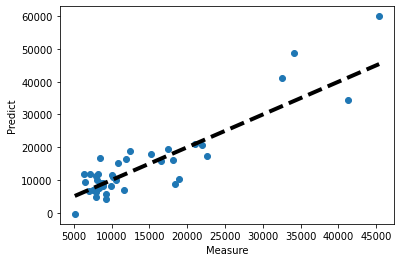

In [43]:
cvpred = cross_val_predict(lm_train, X_test_sig, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, cvpred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measure')
ax.set_ylabel('Predict')
plt.show()